In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Iris_for_softmax_reg.csv')
df.head()

,PC1,PC2,flower_class
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0


In [3]:
X = df[['PC1', 'PC2']]
y = df.flower_class

Split training from test data

In [4]:
from utils_softmax_reg import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X=X, y=y, train_size=0.8, random_state=1)

Determine optimal lambda 

In [6]:
from utils_softmax_reg import optimize_lambda

Lambda: 0.0001 | Avg Log Loss: 0.3746
Lambda: 0.0001 | Avg Log Loss: 0.3746
Lambda: 0.0001 | Avg Log Loss: 0.3746
Lambda: 0.0002 | Avg Log Loss: 0.3746
Lambda: 0.0002 | Avg Log Loss: 0.3746
Lambda: 0.0003 | Avg Log Loss: 0.3746
Lambda: 0.0003 | Avg Log Loss: 0.3746
Lambda: 0.0004 | Avg Log Loss: 0.3746
Lambda: 0.0004 | Avg Log Loss: 0.3746
Lambda: 0.0005 | Avg Log Loss: 0.3746
Lambda: 0.0007 | Avg Log Loss: 0.3746
Lambda: 0.0008 | Avg Log Loss: 0.3746
Lambda: 0.0010 | Avg Log Loss: 0.3746
Lambda: 0.0012 | Avg Log Loss: 0.3746
Lambda: 0.0014 | Avg Log Loss: 0.3746
Lambda: 0.0017 | Avg Log Loss: 0.3746
Lambda: 0.0020 | Avg Log Loss: 0.3746
Lambda: 0.0024 | Avg Log Loss: 0.3746
Lambda: 0.0029 | Avg Log Loss: 0.3746
Lambda: 0.0036 | Avg Log Loss: 0.3746
Lambda: 0.0043 | Avg Log Loss: 0.3746
Lambda: 0.0052 | Avg Log Loss: 0.3746
Lambda: 0.0063 | Avg Log Loss: 0.3746
Lambda: 0.0075 | Avg Log Loss: 0.3746
Lambda: 0.0091 | Avg Log Loss: 0.3746
Lambda: 0.0110 | Avg Log Loss: 0.3746
Lambda: 0.01

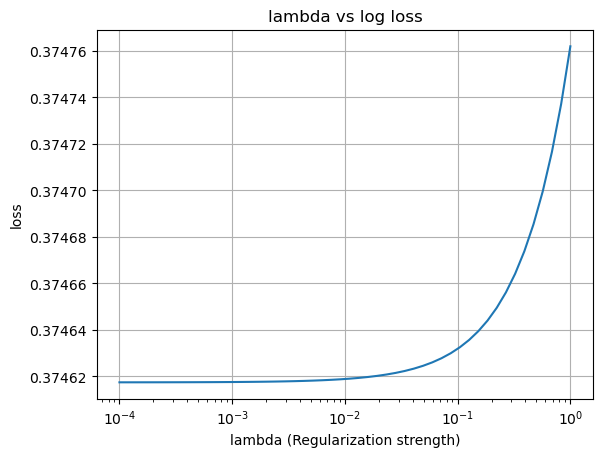

'Best lambda: 0.0001, Average validation Error: 0.374617432557973'

In [7]:
lambda_range = np.logspace(-4,0,50)
optimize_lambda(lambda_range=lambda_range, X=X_train, y=y_train, n_splits=5, random_state=1, show_loss_plot=True)

In [8]:
from utils_softmax_reg import determine_optimal_iterations

'Optimal number of iterations: 218'

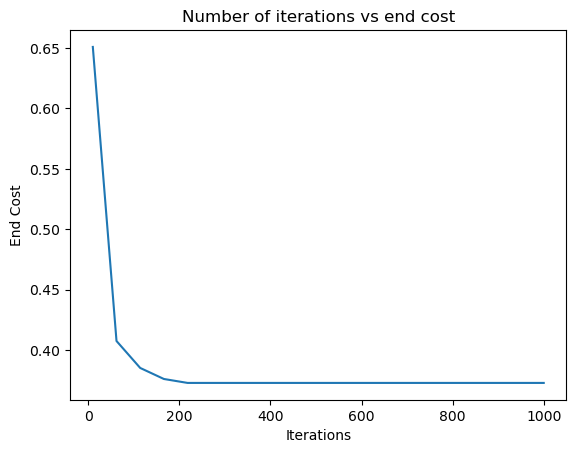

In [9]:
iterations = np.linspace(start=10, stop=1000, num=20, dtype='int64')
determine_optimal_iterations(iteration_range=iterations, X=X_train, y=y_train, _lambda=0.0001, show_plot=True, seed=1)

In [10]:
from utils_softmax_reg import softmax_regression

array([[-1.37634362,  0.84698908,  1.66681523],
       [ 0.72583975, -0.57313592,  0.38872314]])

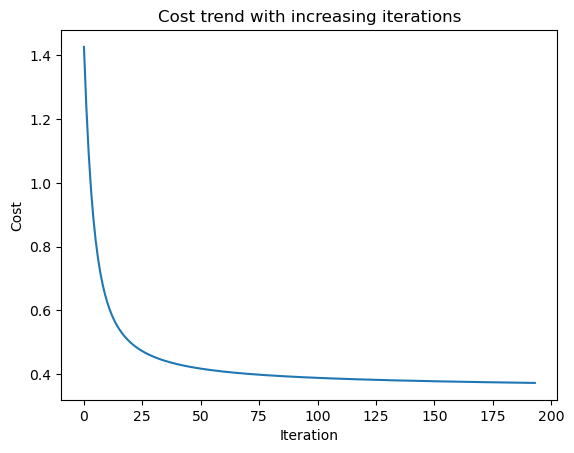

In [11]:
thetas = softmax_regression(X=X_train, y=y_train, iterations=194, learning_rate=0.001, _lambda=0.0001, verbose=True, return_final_cost=False, seed=1, early_stopping=True)
thetas

In [12]:
from utils_softmax_reg import softmax_predict

In [14]:
y_pred = softmax_predict(X=X_test, theta=thetas)
y_pred

array([0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 0], dtype=int64)